<a href="https://colab.research.google.com/github/zahra-teb/Neural-Networks-Projects/blob/main/Tesla%20Stock%20Price%20Prediction/RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

In [ ]:
!cd /content/drive/MyDrive/

In [ ]:
!kaggle datasets download -d ysthehurricane/tesla-stock-data-20162021

  0% 0.00/27.2k [00:00<?, ?B/s]
100% 27.2k/27.2k [00:00<00:00, 53.6MB/s]


In [ ]:
!mkdir data

In [ ]:
!unzip tesla-stock-data-20162021.zip -d data

Archive:  tesla-stock-data-20162021.zip
  inflating: data/TSLA.csv           


In [ ]:
df = pd.read_csv('/content/data/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500
...,...,...,...,...,...,...,...
1253,2021-08-09,710.169983,719.030029,705.130005,713.760010,713.760010,14715300
1254,2021-08-10,713.989990,716.590027,701.880005,709.989990,709.989990,13432300
1255,2021-08-11,712.710022,715.179993,704.210022,707.820007,707.820007,9800600
1256,2021-08-12,706.340027,722.799988,699.400024,722.250000,722.250000,17459100


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No missing values!

In [ ]:
sum(df['Close'] - df['Adj Close'])

0.0

In [ ]:
df.drop('Adj Close',axis=1,inplace=True)
df

,Date,Open,High,Low,Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,10327500
...,...,...,...,...,...,...
1253,2021-08-09,710.169983,719.030029,705.130005,713.760010,14715300
1254,2021-08-10,713.989990,716.590027,701.880005,709.989990,13432300
1255,2021-08-11,712.710022,715.179993,704.210022,707.820007,9800600
1256,2021-08-12,706.340027,722.799988,699.400024,722.250000,17459100


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,10327500
...,...,...,...,...,...,...
1253,2021-08-09,710.169983,719.030029,705.130005,713.760010,14715300
1254,2021-08-10,713.989990,716.590027,701.880005,709.989990,13432300
1255,2021-08-11,712.710022,715.179993,704.210022,707.820007,9800600
1256,2021-08-12,706.340027,722.799988,699.400024,722.250000,17459100


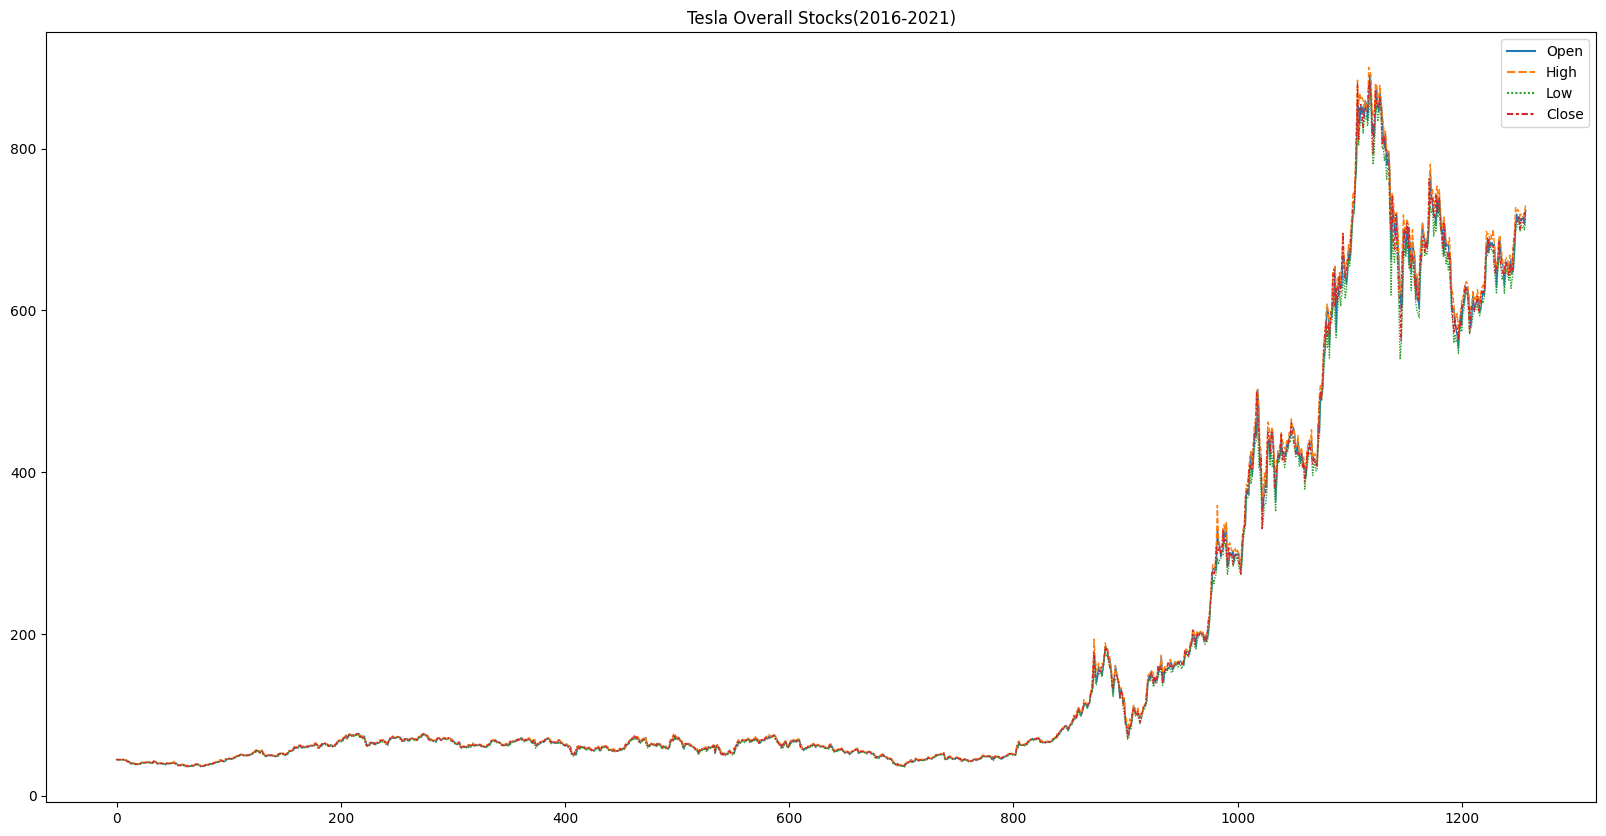

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df.iloc[:, 1:5],linewidth=1)
plt.title(f'Tesla Overall Stocks(2016-2021)')
plt.show()

**Univariate**

**Prepare Stock Close price**

We are going to predict close price.

In [ ]:
close_df = df[['Date','Close']]
close_df

,Date,Close
0,2016-08-16,44.722000
1,2016-08-17,44.647999
2,2016-08-18,44.702000
3,2016-08-19,45.000000
4,2016-08-22,44.585999
...,...,...
1253,2021-08-09,713.760010
1254,2021-08-10,709.989990
1255,2021-08-11,707.820007
1256,2021-08-12,722.250000


<Axes: >

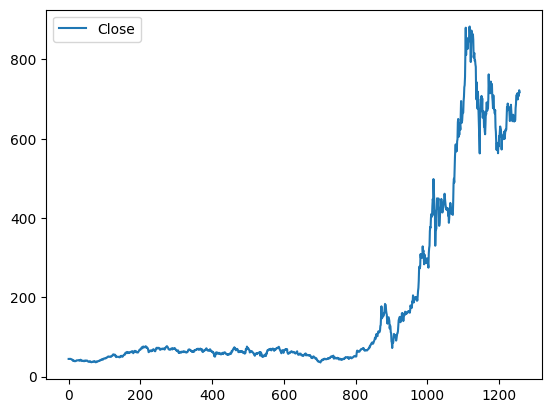

In [ ]:
close_df.iloc[:, 1:2].plot()

In [ ]:
training_set = close_df.iloc[:, 1:2].values

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []
    n = len(data)

    for i in range(n - seq_length - 1):
        start_x = i
        end_x = i + seq_length

        x_i = data[start_x:end_x]
        y_i = data[end_x]

        x.append(x_i)
        y.append(y_i)

    return np.array(x), np.array(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
training_data = scaler.fit_transform(training_set)

In [ ]:
seq_length = 20
x, y = sliding_windows(training_data, seq_length)

In [ ]:
x[0]

array([[0.01053705],
       [0.01044971],
       [0.01051345],
       [0.01086515],
       [0.01037654],
       [0.01082738],
       [0.01030336],
       [0.00991153],
       [0.00968257],
       [0.00855191],
       [0.00764078],
       [0.00779893],
       [0.00514578],
       [0.00444001],
       [0.00563204],
       [0.00536766],
       [0.00434087],
       [0.0036587 ],
       [0.00456275],
       [0.00403165]])

In [ ]:
train_size = int(len(y) * 0.8)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

X_train = Variable(torch.Tensor(np.array(x[0:train_size])))
y_train = Variable(torch.Tensor(np.array(y[0:train_size])))

X_test = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
y_test = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  torch.Size([989, 20, 1])
y_train:  torch.Size([989, 1])
X_test:  torch.Size([248, 20, 1])
y_test torch.Size([248, 1])


**Model Building**

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # init hidden state
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        # init cell state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))

        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)

        return out


**Training**

In [ ]:
# parameters

num_epochs = 1000
learning_rate = 0.01

input_size = 1
hidden_size = 32
num_layers = 1

num_classes = 1

In [ ]:
lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

In [ ]:
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    lstm.train()

    output_train = lstm(X_train)
    optimizer.zero_grad()

    # obtain the loss function
    loss_train = criterion(output_train, y_train)
    train_losses.append(loss_train.item())

    loss_train.backward()
    optimizer.step()

    lstm.eval()
    output_test = lstm(X_test)
    loss_test = criterion(output_test, y_test)
    test_losses.append(loss_test.item())


    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, Training Loss: {loss_train.item()}, Test Loss: {loss_test.item()}")


Epoch: 0, Training Loss: 0.0038248063065111637, Test Loss: 0.4771626591682434
Epoch: 100, Training Loss: 5.1944716688012704e-05, Test Loss: 0.004174453672021627
Epoch: 200, Training Loss: 4.543125396594405e-05, Test Loss: 0.002200107555836439
Epoch: 300, Training Loss: 4.004073707619682e-05, Test Loss: 0.001229270943440497
Epoch: 400, Training Loss: 3.553574060788378e-05, Test Loss: 0.0010532767046242952
Epoch: 500, Training Loss: 3.2496271160198376e-05, Test Loss: 0.0011826782720163465
Epoch: 600, Training Loss: 3.064280463149771e-05, Test Loss: 0.0010259525151923299
Epoch: 700, Training Loss: 2.9284825359354727e-05, Test Loss: 0.0009261706145480275
Epoch: 800, Training Loss: 2.832916652550921e-05, Test Loss: 0.000863863795530051
Epoch: 900, Training Loss: 2.774032145680394e-05, Test Loss: 0.000844159338157624


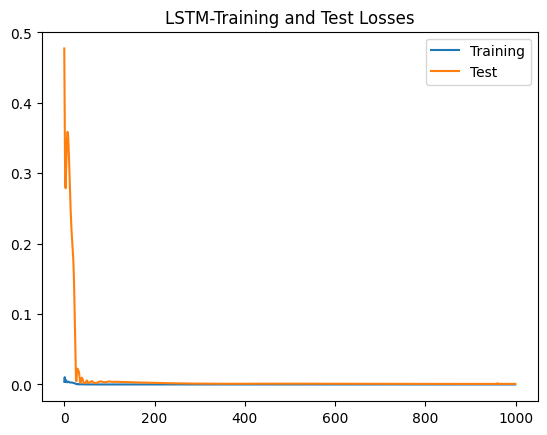

In [ ]:
plt.title("LSTM-Training and Test Losses")
plt.plot(train_losses, label='Training')
plt.plot(test_losses, label='Test')
plt.legend()
plt.show()

**Testing**

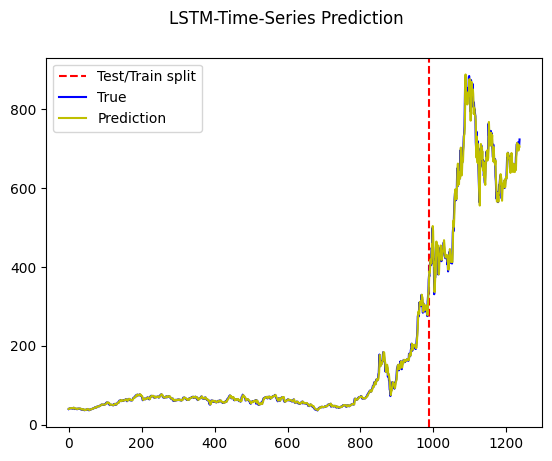

In [ ]:

lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

# Transform back to original form
data_predict = scaler.inverse_transform(data_predict)
dataY_plot = scaler.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, color='b')
plt.plot(data_predict, color='y')
plt.legend(["Test/Train split", "True", "Prediction"], loc ="upper left")

plt.suptitle('LSTM-Time-Series Prediction')
plt.show()

**Test evaluation**

In [ ]:
test_predict = lstm(X_test)

In [ ]:
test_predict = test_predict.detach().numpy()
test_predict = scaler.inverse_transform(test_predict)
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
print("LSTM: Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("LSTM: Test data MSE: ",mean_squared_error(original_ytest,test_predict))
print("LSTM: Test data r2_score: ", r2_score(original_ytest,test_predict))

LSTM: Test data MAE:  18.066251494496292
LSTM: Test data MSE:  604.6502806160578
LSTM: Test data r2_score:  0.96746468112985


**GRU**

In [ ]:
class GRU(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(GRU, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        # Propagate input through GRU
        ula, h_out = self.gru(x, h_0)

        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)

        return out

In [ ]:
gru = GRU(num_classes, input_size, hidden_size, num_layers)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(gru.parameters(), lr=learning_rate)

In [ ]:
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    gru.train()

    output_train = gru(X_train)
    optimizer.zero_grad()

    # obtain the loss function
    loss_train = criterion(output_train, y_train)
    train_losses.append(loss_train.item())

    loss_train.backward()
    optimizer.step()

    gru.eval()
    output_test = gru(X_test)
    loss_test = criterion(output_test, y_test)
    test_losses.append(loss_test.item())


    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, Training Loss: {loss_train.item()}, Test Loss: {loss_test.item()}")


Epoch: 0, Training Loss: 0.014808221720159054, Test Loss: 0.3589434027671814
Epoch: 100, Training Loss: 2.8871481845271774e-05, Test Loss: 0.0009107475052587688
Epoch: 200, Training Loss: 2.773115920717828e-05, Test Loss: 0.0009079679730348289
Epoch: 300, Training Loss: 2.733879409788642e-05, Test Loss: 0.0008747974643483758
Epoch: 400, Training Loss: 2.713516732910648e-05, Test Loss: 0.0008452126639895141
Epoch: 500, Training Loss: 2.7015639716410078e-05, Test Loss: 0.0008214513072744012
Epoch: 600, Training Loss: 2.6940264433505945e-05, Test Loss: 0.0008033720660023391
Epoch: 700, Training Loss: 2.6889909349847585e-05, Test Loss: 0.0007902758661657572
Epoch: 800, Training Loss: 2.6854180759983137e-05, Test Loss: 0.000781318754889071
Epoch: 900, Training Loss: 2.6826934117707424e-05, Test Loss: 0.0007756581180728972


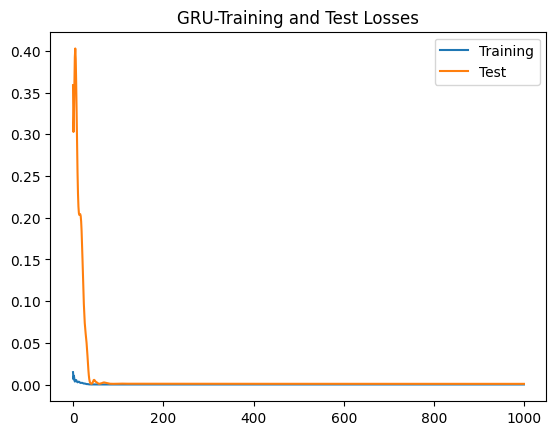

In [ ]:
plt.title("GRU-Training and Test Losses")
plt.plot(train_losses, label='Training')
plt.plot(test_losses, label='Test')
plt.legend()
plt.show()

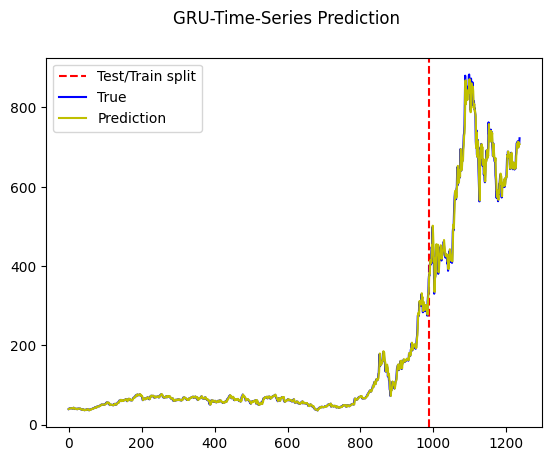

In [ ]:
gru.eval()
train_predict = gru(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

# Transform back to original form
data_predict = scaler.inverse_transform(data_predict)
dataY_plot = scaler.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, color='b')
plt.plot(data_predict, color='y')
plt.legend(["Test/Train split", "True", "Prediction"], loc ="upper left")

plt.suptitle('GRU-Time-Series Prediction')
plt.show()

In [ ]:
test_predict = gru(X_test).detach().numpy()
test_predict = scaler.inverse_transform(test_predict)
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

print("GRU: Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("GRU: Test data MSE: ",mean_squared_error(original_ytest,test_predict))
print("GRU: Test data r2_score: ", r2_score(original_ytest,test_predict))

GRU: Test data MAE:  17.40462892646422
GRU: Test data MSE:  554.5962311464739
GRU: Test data r2_score:  0.9701580139743762


# Multivariate

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,10327500
...,...,...,...,...,...,...
1253,2021-08-09,710.169983,719.030029,705.130005,713.760010,14715300
1254,2021-08-10,713.989990,716.590027,701.880005,709.989990,13432300
1255,2021-08-11,712.710022,715.179993,704.210022,707.820007,9800600
1256,2021-08-12,706.340027,722.799988,699.400024,722.250000,17459100


In [ ]:
features = df.drop(columns=['Date', 'Close'])
features

,Open,High,Low,Volume
0,45.098000,45.438000,44.681999,11335500
1,44.866001,44.966000,44.560001,8935500
2,44.764000,45.132000,44.458000,8572500
3,44.708000,45.034000,44.506001,8297500
4,44.834000,45.021999,44.535999,10327500
...,...,...,...,...
1253,710.169983,719.030029,705.130005,14715300
1254,713.989990,716.590027,701.880005,13432300
1255,712.710022,715.179993,704.210022,9800600
1256,706.340027,722.799988,699.400024,17459100


In [ ]:
target = df[['Close']]
target

,Close
0,44.722000
1,44.647999
2,44.702000
3,45.000000
4,44.585999
...,...
1253,713.760010
1254,709.989990
1255,707.820007
1256,722.250000


In [ ]:
def sliding_windows_2(data, target, seq_length):
    x = []
    y = []
    n = len(target)

    for i in range(n - seq_length - 1):
        start_x = i
        end_x = i + seq_length

        x_i = data[start_x:end_x, :]
        y_i = target[end_x]

        x.append(x_i)
        y.append(y_i)

    return np.array(x), np.array(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

In [ ]:
seq_length = 20
X, y = sliding_windows_2(scaled_features, scaled_target, seq_length)

In [ ]:
X[0]

array([[0.01038168, 0.00983492, 0.01110258, 0.01024978],
       [0.01011039, 0.00928828, 0.01095669, 0.00215252],
       [0.00999111, 0.00948053, 0.0108347 , 0.00092781],
       [0.00992563, 0.00936703, 0.01089211, 0.        ],
       [0.01007297, 0.00935313, 0.01092798, 0.00684893],
       [0.01010805, 0.01013604, 0.01095669, 0.05271486],
       [0.01074653, 0.00982565, 0.01081796, 0.0153713 ],
       [0.00982506, 0.0090497 , 0.01047115, 0.00173754],
       [0.0095982 , 0.00883197, 0.01000476, 0.00977576],
       [0.00913279, 0.00826217, 0.00909111, 0.02710558],
       [0.00818794, 0.00726848, 0.00801959, 0.02546251],
       [0.00685953, 0.00645547, 0.00757233, 0.02727765],
       [0.00652743, 0.00610803, 0.00562304, 0.1059999 ],
       [0.00496515, 0.00427817, 0.00459459, 0.07283993],
       [0.00419103, 0.00428975, 0.00526428, 0.04607173],
       [0.00570653, 0.00504254, 0.00567327, 0.03342482],
       [0.00431498, 0.00351148, 0.00463285, 0.0289882 ],
       [0.0042074 , 0.00351843,

In [ ]:
y[0]

array([0.00411663])

In [ ]:
train_size = int(len(y) * 0.8)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(X)))
dataY = Variable(torch.Tensor(np.array(y)))

X_train = Variable(torch.Tensor(np.array(X[0:train_size, :])))
y_train = Variable(torch.Tensor(np.array(y[0:train_size])))

X_test = Variable(torch.Tensor(np.array(X[train_size:len(X), :])))
y_test = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  torch.Size([989, 20, 4])
y_train:  torch.Size([989, 1])
X_test:  torch.Size([248, 20, 4])
y_test torch.Size([248, 1])


In [ ]:
# parameters

num_epochs = 1000
learning_rate = 0.01

input_size = 4
hidden_size = 32
num_layers = 1

num_classes = 1

In [ ]:
lstm_2 = LSTM(num_classes, input_size, hidden_size, num_layers)
lstm_2

LSTM(
  (lstm): LSTM(4, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm_2.parameters(), lr=learning_rate)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    lstm_2.train()

    output_train = lstm_2(X_train)
    optimizer.zero_grad()

    # obtain the loss function
    loss_train = criterion(output_train, y_train)
    train_losses.append(loss_train.item())

    loss_train.backward()
    optimizer.step()

    lstm_2.eval()
    output_test = lstm_2(X_test)
    loss_test = criterion(output_test, y_test)
    test_losses.append(loss_test.item())


    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, Training Loss: {loss_train.item()}, Test Loss: {loss_test.item()}")


Epoch: 0, Training Loss: 0.004577559884637594, Test Loss: 0.4641024172306061
Epoch: 100, Training Loss: 4.742761666420847e-05, Test Loss: 0.0017571458593010902
Epoch: 200, Training Loss: 4.1718136344570667e-05, Test Loss: 0.005142818205058575
Epoch: 300, Training Loss: 3.4786109608830884e-05, Test Loss: 0.04764746502041817
Epoch: 400, Training Loss: 3.267152715125121e-05, Test Loss: 0.05342425778508186
Epoch: 500, Training Loss: 3.347856909385882e-05, Test Loss: 0.030017461627721786
Epoch: 600, Training Loss: 3.590175401768647e-05, Test Loss: 0.0009128947858698666
Epoch: 700, Training Loss: 3.3191146940225735e-05, Test Loss: 0.0010481888893991709
Epoch: 800, Training Loss: 2.7797072107205167e-05, Test Loss: 0.05991337448358536
Epoch: 900, Training Loss: 2.6169487682636827e-05, Test Loss: 0.043270282447338104


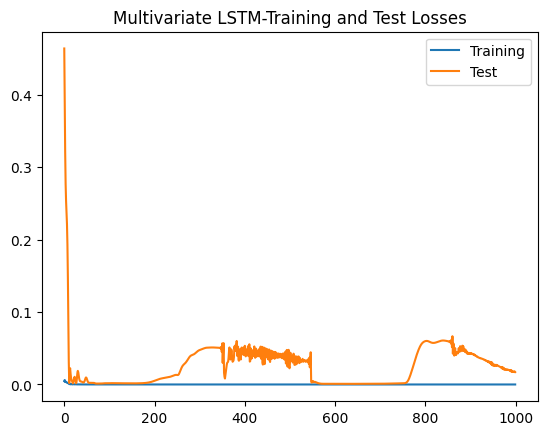

In [ ]:
plt.title("Multivariate LSTM-Training and Test Losses")
plt.plot(train_losses, label='Training')
plt.plot(test_losses, label='Test')
plt.legend()
plt.show()

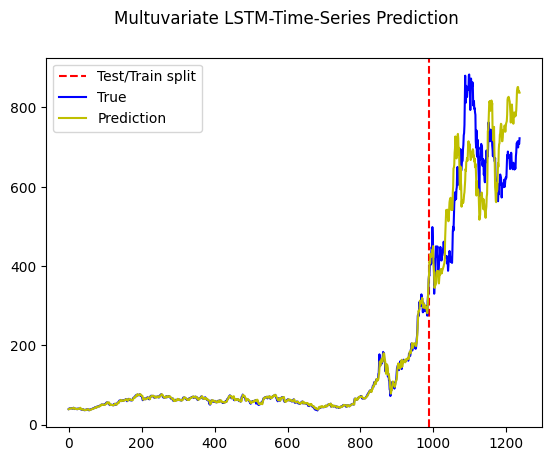

In [ ]:
lstm_2.eval()
train_predict = lstm_2(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

# Transform back to original form
data_predict = scaler.inverse_transform(data_predict)
dataY_plot = scaler.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, color='b')
plt.plot(data_predict, color='y')
plt.legend(["Test/Train split", "True", "Prediction"], loc ="upper left")

plt.suptitle('Multuvariate LSTM-Time-Series Prediction')
plt.show()

**Not so good! Let's change the hidden_size:**

In [ ]:
num_epochs = 1000
learning_rate = 0.01

input_size = 4
hidden_size = 80 # 20 * 4
num_layers = 1

num_classes = 1

In [ ]:
lstm_3 = LSTM(num_classes, input_size, hidden_size, num_layers)
lstm_3

LSTM(
  (lstm): LSTM(4, 80, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm_3.parameters(), lr=learning_rate)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    lstm_3.train()

    output_train = lstm_3(X_train)
    optimizer.zero_grad()

    # obtain the loss function
    loss_train = criterion(output_train, y_train)
    train_losses.append(loss_train.item())

    loss_train.backward()
    optimizer.step()

    lstm_3.eval()
    output_test = lstm_3(X_test)
    loss_test = criterion(output_test, y_test)
    test_losses.append(loss_test.item())


    if epoch % 100 == 0:
      print(f"Epoch: {epoch}, Training Loss: {loss_train.item()}, Test Loss: {loss_test.item()}")


Epoch: 0, Training Loss: 0.021814770996570587, Test Loss: 0.26329511404037476
Epoch: 100, Training Loss: 4.3958938476862386e-05, Test Loss: 0.0020806912798434496
Epoch: 200, Training Loss: 4.0705523133510724e-05, Test Loss: 0.0010344493202865124
Epoch: 300, Training Loss: 3.8598627725150436e-05, Test Loss: 0.0009667733102105558
Epoch: 400, Training Loss: 3.666767224785872e-05, Test Loss: 0.00094661331968382
Epoch: 500, Training Loss: 3.5246190236648545e-05, Test Loss: 0.0010563799878582358
Epoch: 600, Training Loss: 3.347423262312077e-05, Test Loss: 0.003080989932641387
Epoch: 700, Training Loss: 3.546531297615729e-05, Test Loss: 0.0016606771387159824
Epoch: 800, Training Loss: 3.428312629694119e-05, Test Loss: 0.0010751168010756373
Epoch: 900, Training Loss: 3.3368138247169554e-05, Test Loss: 0.0009576787706464529


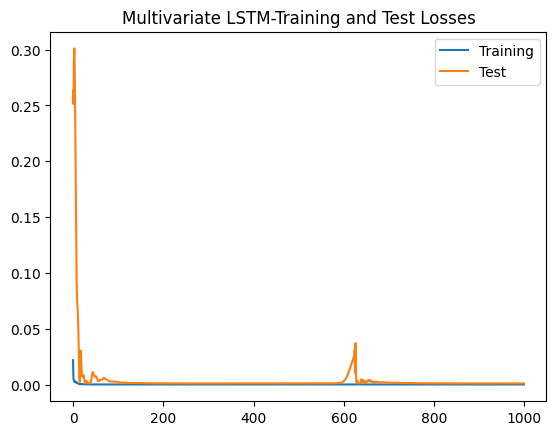

In [ ]:
plt.title("Multivariate LSTM-Training and Test Losses")
plt.plot(train_losses, label='Training')
plt.plot(test_losses, label='Test')
plt.legend()
plt.show()

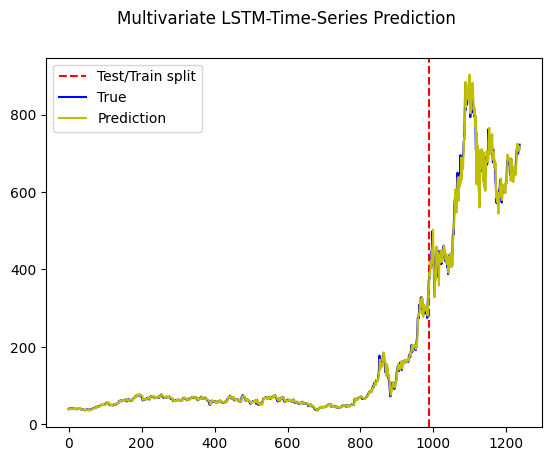

In [ ]:
lstm_3.eval()
train_predict = lstm_3(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

# Transform back to original form
data_predict = scaler.inverse_transform(data_predict)
dataY_plot = scaler.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, color='b')
plt.plot(data_predict, color='y')
plt.legend(["Test/Train split", "True", "Prediction"], loc ="upper left")

plt.suptitle('Multivariate LSTM-Time-Series Prediction')
plt.show()

**Much better! Now we get the test evaluation metrics:**

In [ ]:
test_predict = lstm_3(X_test).detach().numpy()
test_predict = scaler.inverse_transform(test_predict)
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

print("Multivariate LSTM: Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("Multivariate LSTM: Test data MSE: ",mean_squared_error(original_ytest,test_predict))
print("Multivariate LSTM: Test data r2_score: ", r2_score(original_ytest,test_predict))

Multivariate LSTM: Test data MAE:  20.28322074571947
Multivariate LSTM: Test data MSE:  714.1189233751786
Multivariate LSTM: Test data r2_score:  0.9615743387077449
